# ML Report - cardiovascular disease

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset and a first view of the dataset
df = pd.read_csv("../data/cardio_train.csv", sep=";").drop(columns="id")
df.head()
# df.info()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Manipulate data
df["age"] = (df["age"]/365).astype(int) # Convert age from days to years
df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


Hur m˚anga ¨ar positiva f¨or hj¨art-k¨arlsjukdom och hur m˚anga ¨ar negativa?
b) Hur stor andel har normala, ¨over normala och l˚angt ¨over normala kolesterolv
¨arden?
c) Hur ser ˚aldersf¨ordelningen ut?
d) Hur stor andel r¨oker?
e) Hur ser viktf¨ordelningen ut?
f) Hur ser l¨angdf¨ordelningen ut?
g) Hur stor andel av kvinnor respektive m¨an har hj¨art-k¨arlsjukdom?

TypeError: Text.set_text() got an unexpected keyword argument 'fontsize'

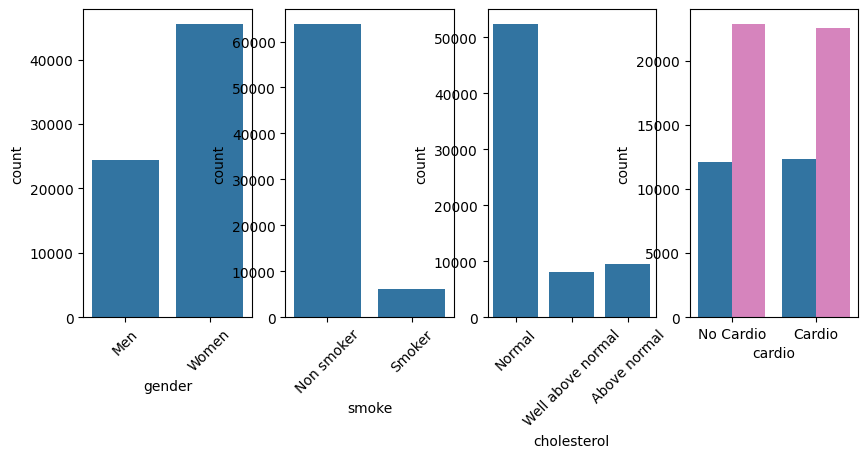

In [48]:
# EDA on dataset
from helpers import rename_columns

df_renamed = rename_columns(df)

cols_countplot = ["gender", "smoke", "cholesterol", "cardio"]
colors = sns.color_palette().as_hex()
blue, pink = colors[0], colors[6]

fig, axs = plt.subplots(nrows=1,ncols=len(cols_countplot), figsize=(10,4))
for i, col in enumerate(cols_countplot):
    if col != "cardio":
        sns.countplot(ax=axs[i], x=df_renamed[col])
    else: 
        sns.countplot(ax=axs[i], x=df_renamed[col], hue=df_renamed["gender"], palette=[blue, pink], legend=None)
        # axs[i].title.set_text("Blue = Male, Pink = Female", fontsize=12)
        axs[i].set_title("Blue = Male, Pink = Female", fontsize=12)
    axs[i].tick_params(axis="x", labelrotation=45)

fig.suptitle("EDA Countplots")
fig.tight_layout()

plt.savefig("../visualizations/g-s-ch-c_distribution.png")


Längd och viktfördelning

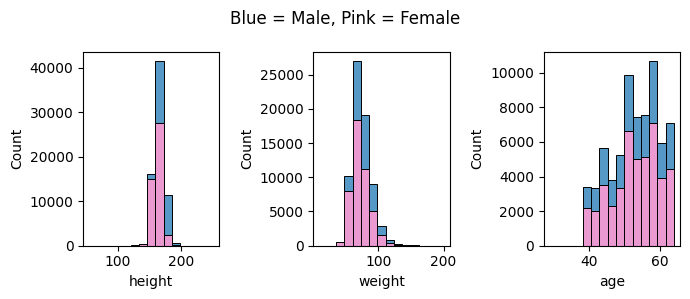

In [38]:
fig, axs = plt.subplots(1,3, figsize=(7,3))
cols_histplot = ["height", "weight", "age"]

for i, col in enumerate(cols_histplot):
    sns.histplot(ax=axs[i], data=df_renamed, x=col, hue="gender", palette=[blue,pink], bins=15, legend=None, multiple="stack")

fig.suptitle("Blue = Male, Pink = Female")
fig.tight_layout()

plt.savefig("../visualizations/h-w-a_distribution.png")

array(['Men', 'Women'], dtype=object)